<a href="https://colab.research.google.com/github/joliee22/jolie/blob/main/Ass1_AI_Platforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

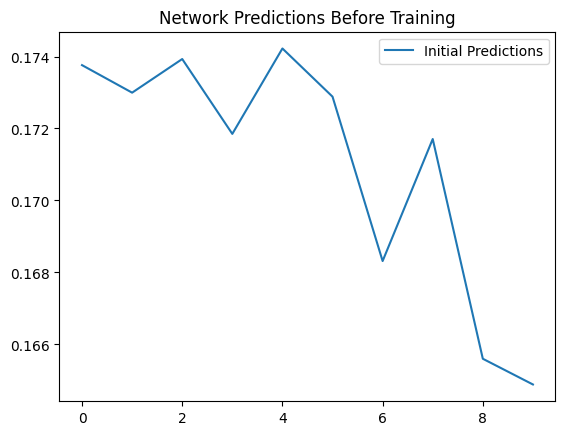

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()

        self.layer1 = nn.Linear(3, 3)  # Input to first hidden layer (3 inputs, 3 neurons)
        self.layer2 = nn.Linear(3, 3)  # First hidden to second hidden layer
        self.layer3 = nn.Linear(3, 3)  # Second hidden to third hidden layer
        self.output_layer = nn.Linear(3, 1)  # Third hidden to output layer (1 output)

        nn.init.uniform_(self.layer1.weight, 0, 1)
        nn.init.uniform_(self.layer2.weight, 0, 1)
        nn.init.uniform_(self.layer3.weight, 0, 1)
        nn.init.uniform_(self.output_layer.weight, 0, 1)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        x = torch.tanh(self.output_layer(x))
        return x

np.random.seed(42)
torch.manual_seed(42)
inputs = torch.rand((10, 3))  # 10 random inputs of 3 features each

net = SimpleNeuralNet()

initial_preds = net(inputs).detach().numpy()

sns.lineplot(data=initial_preds.flatten(), label='Initial Predictions')
plt.title('Network Predictions Before Training')
plt.show()


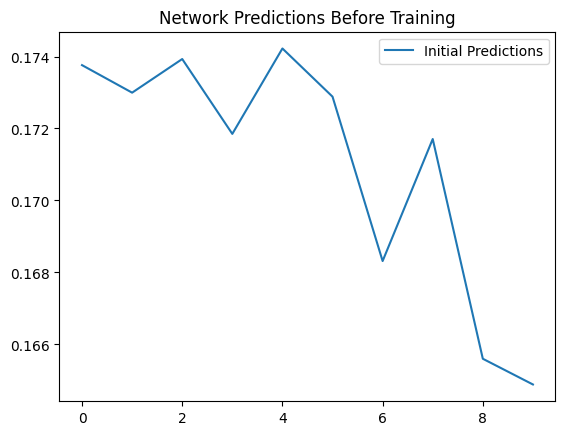

In [ ]:

optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

targets = torch.ones((10, 1))

initial_preds = net(inputs).detach().numpy()

sns.lineplot(data=initial_preds.flatten(), label='Initial Predictions')
plt.title('Network Predictions Before Training')
plt.show()


Epoch 1/100, Loss: 0.6872266530990601
Epoch 11/100, Loss: 0.2864477038383484
Epoch 21/100, Loss: 0.16212834417819977
Epoch 31/100, Loss: 0.108772873878479
Epoch 41/100, Loss: 0.08040479570627213
Epoch 51/100, Loss: 0.06316325068473816
Epoch 61/100, Loss: 0.05170784145593643
Epoch 71/100, Loss: 0.043602097779512405
Epoch 81/100, Loss: 0.037592675536870956
Epoch 91/100, Loss: 0.03297485038638115


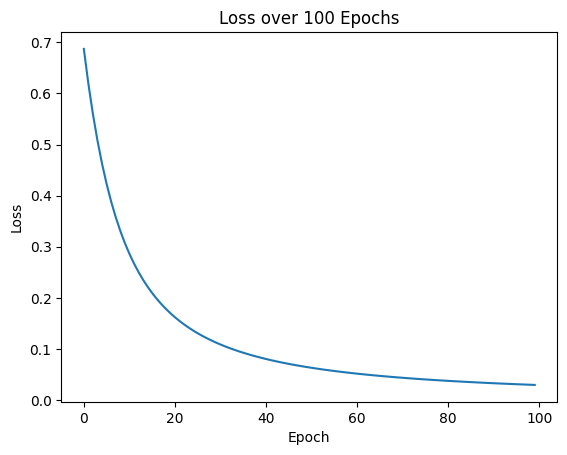

In [3]:
# Step 3: Training loop
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

plt.plot(losses)
plt.title('Loss over 100 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


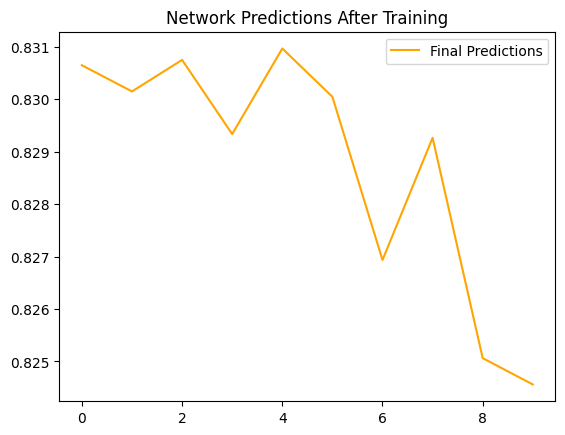

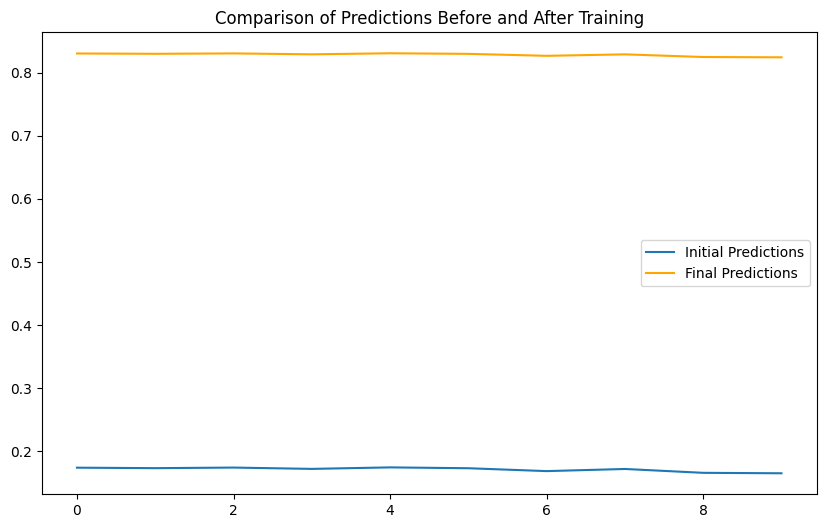

In [4]:
final_preds = net(inputs).detach().numpy()

sns.lineplot(data=final_preds.flatten(), label='Final Predictions', color='orange')
plt.title('Network Predictions After Training')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=initial_preds.flatten(), label='Initial Predictions')
sns.lineplot(data=final_preds.flatten(), label='Final Predictions', color='orange')
plt.title('Comparison of Predictions Before and After Training')
plt.legend()
plt.show()
